In [9]:
# Se cargan las bibliotecas de pandas y numpy
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib. pyplot as plt
import komm
import random
from scipy.stats import anderson
from scipy.stats import zscore
from scipy.signal import butter, filtfilt

In [10]:
# Cargar los datos desde el archivo Excel
df = pd.read_excel('Dataset.xlsx', header=0)

columna_seleccionada = "BPM"

datos = df[columna_seleccionada]



In [11]:
def butterworth_filter(data, cutoff_freq, fs, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Frecuencia de corte para el filtro Butterworth
cutoff_freq = 0.01 
fs = 0.1  # Frecuencia de muestreo

# Aplicar el filtro Butterworth
datos_filtrados = butterworth_filter(datos, cutoff_freq, fs)

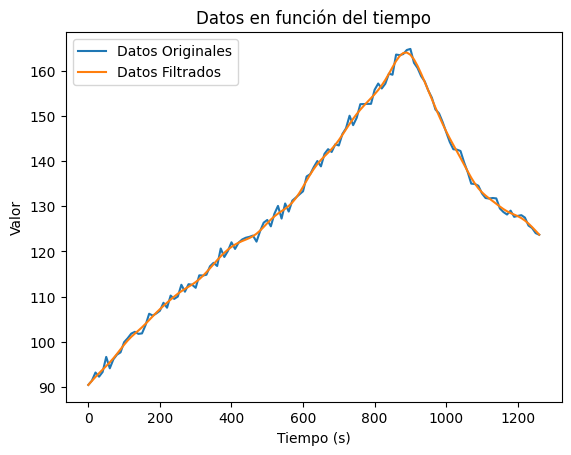

In [12]:
# Graficar los datos originales y los datos filtrados en función del tiempo
plt.plot(df['Tiempo(s)'], datos, label='Datos Originales')
plt.plot(df['Tiempo(s)'], datos_filtrados, label='Datos Filtrados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor')
plt.title('Datos en función del tiempo')
plt.legend()
plt.show()

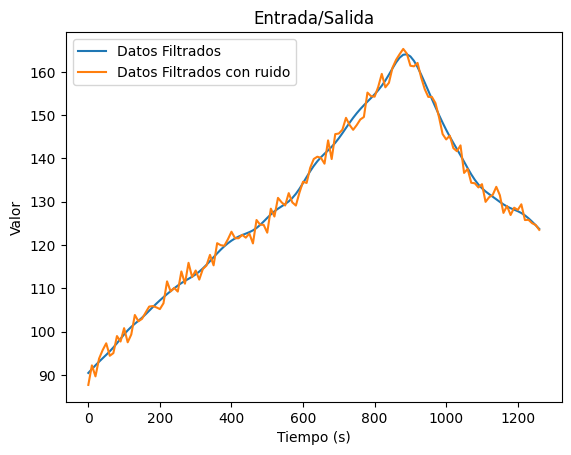

In [16]:
awgn = komm.AWGNChannel(snr=2.0, signal_power=5.0)
salida_canal = awgn(datos_filtrados); np.around(salida_canal, decimals=2)
# Graficar los datos filtrados y los datos con ruido en función del tiempo
plt.plot(df['Tiempo(s)'], datos_filtrados, label='Datos Filtrados')
plt.plot(df['Tiempo(s)'], salida_canal, label='Datos Filtrados con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor')
plt.title('Entrada/Salida')
plt.legend()
plt.show()